In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### [Q1. 부모의 학력과 자녀의 대학진학여부 관계 검토]

In [5]:
df = pd.read_csv("cleanDescriptive.csv", sep = ',', header = 0, 
                encoding='ansi')

In [6]:
df.head(4)

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0,2.0,특별시,남자,장년층,고졸,실패
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0,2.0,광역시,남자,장년층,대졸,실패
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0,2.0,NaN,남자,노년층,대졸,합격
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0,NaN,광역시,여자,장년층,NaN,합격


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
resident     231 non-null float64
gender       248 non-null int64
age          248 non-null int64
level        236 non-null float64
cost         248 non-null float64
type         235 non-null float64
survey       160 non-null float64
pass         235 non-null float64
cost2        165 non-null float64
resident2    231 non-null object
gender2      248 non-null object
age2         248 non-null object
level2       236 non-null object
pass2        235 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 27.2+ KB


In [8]:
df2 = df[['level2','pass2']]

In [9]:
np.bincount(df2['level2'].isnull())

array([236,  12], dtype=int64)

In [10]:
df3 = df2.dropna(how = 'any')

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 247
Data columns (total 2 columns):
level2    225 non-null object
pass2     225 non-null object
dtypes: object(2)
memory usage: 5.3+ KB


In [12]:
pd.crosstab(df3.level2, df3.pass2)

pass2,실패,합격
level2,,
고졸,40,49
대졸,27,55
대학원졸,23,31


- 귀무가설 : 부모의 학력과 자녀의 대학진학여부는 관련이 없다(독립이다)
- 대립가설 : 부모의 학력과 자녀의 대학진학여부는 관련이 있다

In [13]:
chi2, p, dof, ef = stats.chi2_contingency(pd.crosstab(df3.level2, df3.pass2),
                                         correction=False)

In [14]:
p

0.25070568406521354

In [15]:
ef

array([[35.6, 53.4],
       [32.8, 49.2],
       [21.6, 32.4]])

부모의 학력과 자녀의 대학진학여부의 카이제곱 독립성 검정결과 유의확률 0.25 > 0.05이므로 귀무가설을 기각할 수 없고, <u>**부모의 학력과 자녀의 대학진학여부는 관련이 없다**</u>

### [Q2. diamonds]

2-1) price와 상관성이 높은 변수는?  
2-2) price 변수의 확률밀도함수로 분포 확인  
2-3) 아래의 조건에 따라 price2변수를 범주형 변수로 생성  
- 1분위수 미만: 'low'
- iqr : 'mid'
- 윗 극단치 경계 이하 : 'high'
- 15000미만 : 'vh' (very high)
- 그 이상 : 'sp' (special)

2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단

- pip install seaborn --upgrade

In [3]:
dia = sns.load_dataset('diamonds')

1. 수치형 변수간 상관분석

In [4]:
dia_numeric = dia[['carat']].join(dia.iloc[:,4:])

In [5]:
dia_numeric.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


(0, 7)

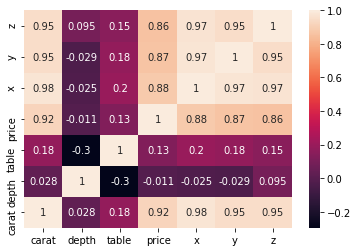

In [6]:
sns.heatmap(dia_numeric.corr(), annot = True)
plt.ylim([0,7])

[상관분석 결과]

가격과 가장 상관성이 높은 변수는 carat이며, carat과 다이아몬드 크기와 관련된 변수인 x, y, z의 상관성이 각각 0.98, 0.95, 0.95로 매우 높게 나타났다.

[교차분석]

- cut과 color의 관계는?

In [7]:
pd.crosstab(dia['cut'], dia['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [8]:
chi, p, dof, ef = stats.chi2_contingency(pd.crosstab(dia['cut'], dia['color']))

In [9]:
p

1.3945120919852248e-51

p-value는 현저히 낮게 나타났고 cut과 color 변수간 관계가 없다(독립적이다)는 귀무가설을 기각한다. 따라서 cut과 color 두 변수는 서로 관련이 있다.

---

cf) pandas category 타입의 numeric 변환

In [10]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null category
color      53940 non-null category
clarity    53940 non-null category
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
dia['cut'] = dia['cut'].astype('category')

In [12]:
dia['cut'].cat.codes

0        0
1        1
2        3
3        1
4        3
        ..
53935    0
53936    3
53937    2
53938    1
53939    0
Length: 53940, dtype: int8

In [13]:
dia['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Ideal, Premium, Very Good, Good, Fair]

---

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


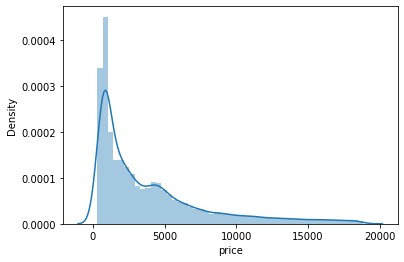

In [14]:
sns.distplot(dia['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe5d307f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe5d309f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe5d307588>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe5d30eec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe5d30efc8>],
 'means': []}

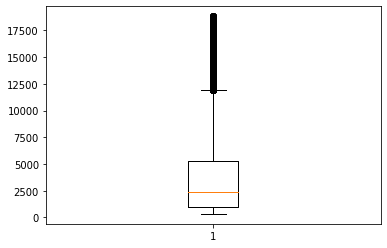

In [15]:
plt.boxplot(dia['price'])

In [16]:
dia.describe()['price']

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [17]:
p_low = dia.describe()['price'].loc['25%']
p_mid = dia.describe()['price'].loc['75%'] - dia.describe()['price'].loc['25%']
p_high = dia.describe()['price'].loc['75%'] + 1.5*p_mid

윗수염경계 밖 이상치 분포 확인

In [18]:
dia['price'][(dia['price'] >= p_high)]

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


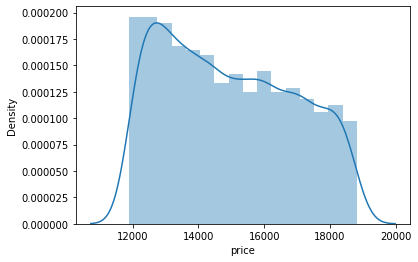

In [19]:
sns.distplot(dia['price'][(dia['price'] >= p_high)])

In [20]:
dia['price'][(dia['price'] >= p_high)&(dia['price'] < 15000)]

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
25879    14982
25880    14982
25881    14982
25882    14998
25883    14998
Name: price, Length: 1884, dtype: int64

윗수염경계 밖의 이상치는 전체 3540개가 위치하고 있으며, 대략 그 빈도를 절반으로 나누는 15000을 `very high`(vh)와 `special`(sp)로 결정

In [21]:
dia['price2'] = np.where(dia['price']<p_low,'low',
                         np.where(dia['price']<p_mid,'mid',
                                  np.where(dia['price']<p_high,'high',
                                          np.where(dia['price']<15000,'vh','sp'))))

In [24]:
pd.crosstab(dia['cut'],dia['price2'])[['low','mid','high','vh','sp']]

price2,low,mid,high,vh,sp
cut,,,,,
Ideal,6304,9482,4606,627,532
Premium,2905,5328,4300,671,587
Very Good,3129,4867,3329,390,367
Good,1057,2245,1339,136,129
Fair,88,980,441,60,41


In [113]:
chi2, p, dof, ef = stats.chi2_contingency(pd.crosstab(dia['cut'],dia['price2']))

In [154]:
chi2

1262.7018754393625

In [114]:
p

5.153130778705806e-259

In [115]:
ef

array([[5599.50435669, 5386.95092696, 9150.18542825,  661.63248053,
         752.72680756],
       [3583.25667408, 3447.23865406, 5855.42235818,  423.39443826,
         481.68787542],
       [3139.21449759, 3020.05202076, 5129.81023359,  370.92680756,
         421.99644049],
       [1274.70504264, 1226.31809418, 2083.00355951,  150.61802002,
         171.35528365],
       [ 418.319429  ,  402.44030404,  683.57842047,   49.42825362,
          56.23359288]])

In [116]:
pd.crosstab(dia['cut'],dia['price2'], margins = True)

price2,high,low,mid,sp,vh,All
cut,,,,,,
Ideal,4606,6304,9482,532,627,21551
Premium,4300,2905,5328,587,671,13791
Very Good,3329,3129,4867,367,390,12082
Good,1339,1057,2245,129,136,4906
Fair,441,88,980,41,60,1610
All,14015,13483,22902,1656,1884,53940


In [151]:
xs = np.linspace(0,50,200)

In [147]:
# 자유도가 16인 카이제곱분포를 따르는 확률변수 생성
rv = stats.chi2(16)

In [148]:
# 유의수준 0.05일 때 카이제곱통계량
rv.isf(0.05)

26.296227604864242

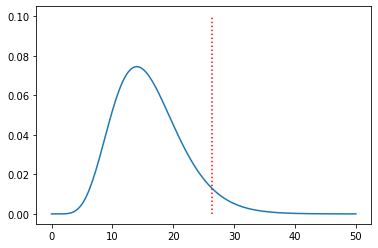

In [153]:
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.1, color = 'r', ls = ':')

cf) categoricalDtype
- 범주형 변수의 범주 순서 지정(서열척도 가능)

In [124]:
from pandas.api.types import CategoricalDtype

In [125]:
price_cat_type = CategoricalDtype(categories = ['low','mid','high','vh','sp'], ordered = False)

In [126]:
dia['price3'] = dia['price2'].astype(price_cat_type)

In [129]:
pd.crosstab(dia['cut'],dia['price3'], margins = True)

price3,low,mid,high,vh,sp,All
cut,,,,,,
Ideal,6304,9482,4606,627,532,21551
Premium,2905,5328,4300,671,587,13791
Very Good,3129,4867,3329,390,367,12082
Good,1057,2245,1339,136,129,4906
Fair,88,980,441,60,41,1610
All,13483,22902,14015,1884,1656,53940


In [132]:
_,p,_,ef = stats.chi2_contingency(pd.crosstab(dia['cut'],dia['price3']))

In [133]:
p

5.153130778705806e-259

In [134]:
ef

array([[5386.95092696, 9150.18542825, 5599.50435669,  752.72680756,
         661.63248053],
       [3447.23865406, 5855.42235818, 3583.25667408,  481.68787542,
         423.39443826],
       [3020.05202076, 5129.81023359, 3139.21449759,  421.99644049,
         370.92680756],
       [1226.31809418, 2083.00355951, 1274.70504264,  171.35528365,
         150.61802002],
       [ 402.44030404,  683.57842047,  418.319429  ,   56.23359288,
          49.42825362]])

Q) 'Ideal' & 'low' 등급의 기대빈도를 계산해보세요

In [135]:
13483 * (21551/53940)

5386.950926955877

cut과 범주형으로 변환한 price3 간의 교차분석 및 카이제곱 검정을 실시한 결과  
p-value는 5.153130778705806e-259로 매우 작아 귀무가설을 기각한다.  

**따라서, cut변수와 price3변수는 서로 독립적이지 않다.**